In [1]:
import easyidp as idp
from pathlib import Path

In [1]:
lotus = idp.data.Lotus()

In [ ]:
roi = idp.ROI(lotus.shp, name_field = "plot_id")
roi.get_z_from_dsm(lotus.metashape.dsm, mode="point")
roi

In [2]:
roi_path = Path("/ofo-share/str-disp_drone-data_products-202212meta184fast/testing-add-80m-to-existing/crown_delin/crowns-02.shp")
roi = idp.ROI(roi_path, name_field = "tree_id")

dem_path = Path("/ofo-share/str-disp_drone-data_products-202212meta184fast/testing-add-80m-to-existing/yuba3subset/yuba3subset-120m-manual-20230128_dem.tif")
roi.get_z_from_dsm(dem_path, mode="point")
roi

[shp][proj] Use projection [WGS 84] for loaded shapefile [crowns-02.shp]


Read shapefile [crowns-02.shp]: 100%|██████████| 1/1 [00:00<00:00, 6492.73it/s]


Could not find prefered [GTCitationGeoKey, PCSCItationGeoKey], but find [GeogCitationGeoKey]=WGS 84 instead for Coordinate Reference System (CRS)


Read z values of roi from DSM [yuba3subset-120m-manual-20230128_dem.tif]: 100%|██████████| 1/1 [00:00<00:00, 17.57it/s]


<easyidp.ROI> with 1 items
[0]	1
array([[-120.87558016,   39.50405641, 1408.46643066],
       [-120.8755584 ,   39.50407689, 1411.63024902],
       [-120.87554624,   39.50408586, 1412.32861328],
       ...,
       [-120.8755776 ,   39.50403977, 1408.06982422],
       [-120.87558656,   39.50404681, 1408.13208008],
       [-120.87558016,   39.50405641, 1408.46643066]])

In [8]:
msproj = Path("/ofo-share/str-disp_drone-data_products-202212meta184fast/testing-add-80m-to-existing/yuba3subset/yuba3subset-120mAnd80m-22-keeppoints_20230102T0559.psx")

In [81]:
msproj = Path("/ofo-share/str-disp_drone-data_products-202212meta184fast/testing-add-80m-to-existing/yuba3subset/example-multifolder.psx")

In [114]:
ms = idp.Metashape(msproj, chunk_id=0)

In [115]:
ms

<'example-multifolder.psx' easyidp.Metashape object with 1 active chunks>

  id  label
----  -------
-> 0  Chunk 1

In [116]:
ms.photos[57].label

'100MEDIA-DJI_0165'

In [117]:
for i in range(len(ms.photos)):
    ms.photos[i].label = "newlabel" + str(i) 

In [118]:
ms.photos[57].label

'newlabel57'

In [84]:
root_dir = Path("/ofo-share/tnc-yuba-2021/")

for p in ms.photos:
    p
    path = Path(p.path)
    relpath = path.relative_to(root_dir)
    p.label = str(relpath)

In [119]:
ms.photos[200].label

'newlabel200'

In [120]:
img_dict_ms = roi.back2raw(ms)

Backward roi to raw images: 100%|██████████| 1/1 [00:00<00:00, 64.74it/s]


In [121]:
img_dict_ms

{'1': {'100MEDIA-DJI_0165': array([[4741.6161679 ,  684.46603374],
         [4735.11907978,  712.14368673],
         [4718.00310275,  728.6865289 ],
         [4722.27333877,  728.17479155],
         [4725.13564168,  695.07115979],
         [5139.29793025,  397.94996575],
         [5000.89959085,  400.99769452],
         [4583.68418908,  600.96969944],
         [4579.75113966,  581.14986348],
         [4610.12103712,  546.5976079 ],
         [4612.95236268,  542.39205672],
         [4656.78614176,  518.44064048],
         [5019.47109729,  310.90997199],
         [4671.51128988,  555.28478923],
         [5115.04310559,  315.94033512],
         [4707.5482532 ,  588.20477437],
         [4720.57225312,  621.70467237],
         [5456.98935037,  194.98276932],
         [4735.25285888,  644.21978288],
         [4751.86926517,  663.3627527 ],
         [4741.6161679 ,  684.46603374]]),
  '100MEDIA-DJI_0189': array([[ 904.66690626,  709.82748032],
         [ 924.07931819,  627.82748266],
        

In [ ]:
# Dict to table



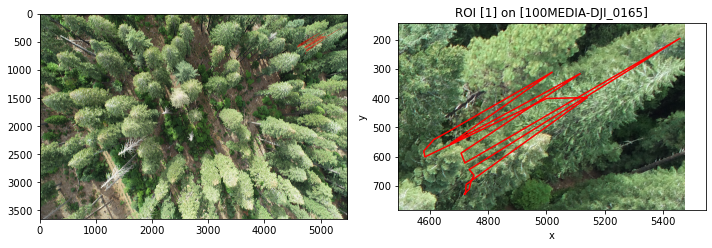

<Figure size 640x480 with 0 Axes>

In [124]:
ms.show_roi_on_img(img_dict_ms, "1", "newlabel57")

In [ ]:
img_dict_ms = roi.back2raw(ms, save_folder = "/ofo-share/str-disp_drone-data_products-202212meta184fast/testing-add-80m-to-existing/crown_delin/crowns_02_crops/")